In [1]:
import numpy as np


In [2]:
techniques = {"BERT": "BERT ptBR",
              "BERT_FINE": "BERT Jud",
              "GPT2": "GPT-2 ptBR",
              "GPT2_FINE": "GPT-2 Jud",
              "RoBERTa": "RoBERTa ptBR",
              "RoBERTa_FINE": "RoBERTa Jud"}

path = 'data/' 

In [3]:
results = dict()
for type in techniques:
    value = techniques[type]
    loaded = np.load(path + type + '/' + 'inercias.npz', allow_pickle=True)
    results[type] = {"name": value, "n_clusters": loaded["n_clusters"], "inertia_values": loaded["inertia_values"]}
    

72.0


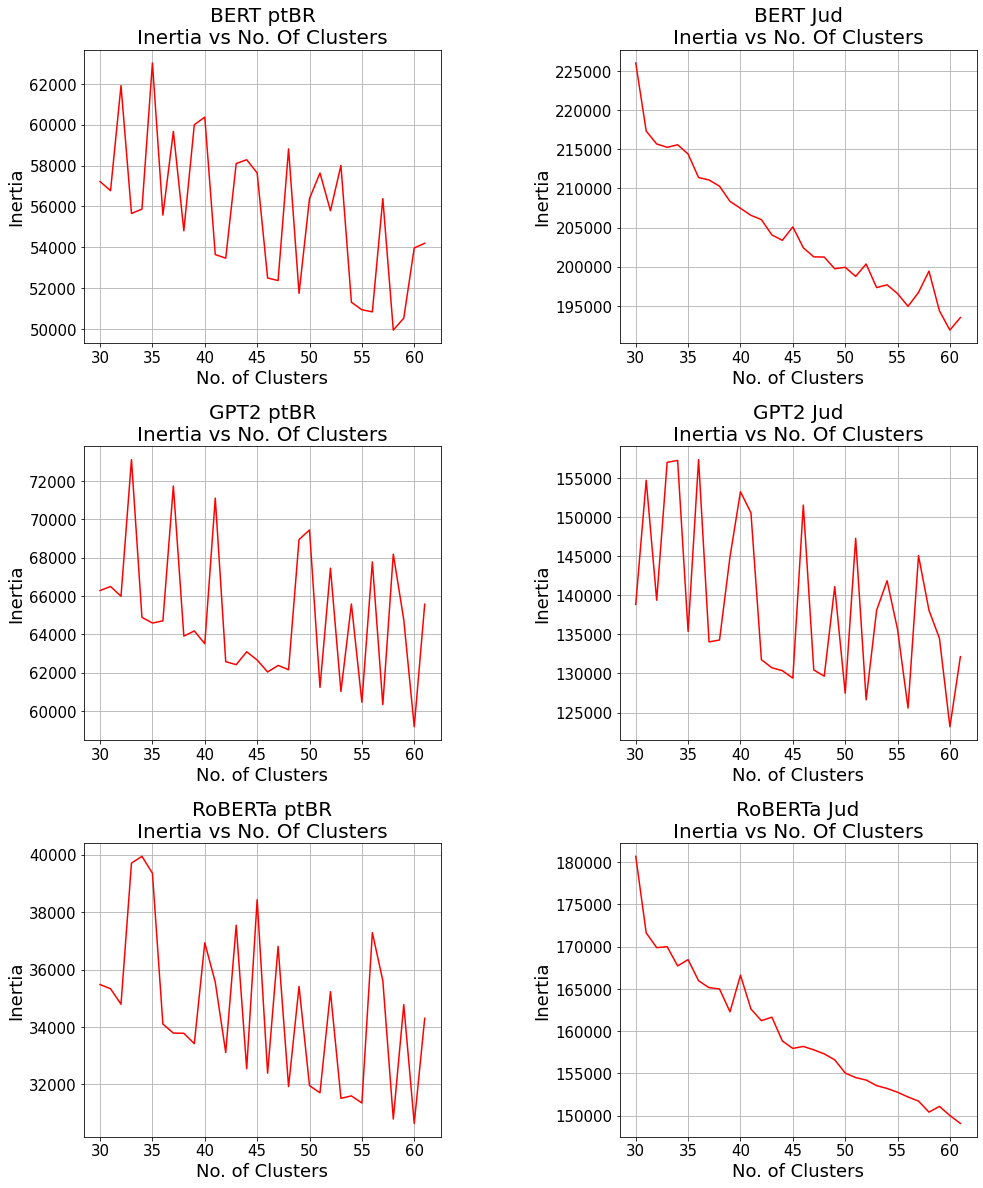

In [4]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt

fig = plt.figure(constrained_layout=False, figsize=(16, 20))

gs = gridspec.GridSpec(3, 2, figure=fig)
gs.update(wspace=0.5, hspace=0.35)

index = 0
for type in techniques:
    ax = fig.add_subplot(gs[int(index/2), index%2])
    ax.plot(results[type]["n_clusters"], results[type]["inertia_values"], color='red')
    ax.set_xlabel('No. of Clusters', fontsize=18)
    ax.set_ylabel('Inertia', fontsize=18)
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)
    ax.set_title(results[type]["name"] + '\nInertia vs No. Of Clusters', fontsize=20)
    ax.grid()

    index += 1

print(fig.dpi)
fig.savefig('Inertia.png', dpi=600)